#**Part 1**  - Data Agumentation

In [ ]:
import cv2
import random

In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import os

TensorFlow 1.x selected.


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


### Open CV Functions for Agumentation

In [ ]:
def rotate(image, angle=90, scale=1.0):
        w = image.shape[1]
        h = image.shape[0]
        #rotate matrix
        M = cv2.getRotationMatrix2D((w/2,h/2), angle, scale)
        #rotate
        image = cv2.warpAffine(image,M,(w,h))
        return image

def verticleflip(image):
        image = cv2.flip(image, flipCode=1)
        return image 

def horizontalflip(image):
        image = cv2.flip(image, flipCode=0)
        return image 

def verticleandhorizontalflip(image):
        image = cv2.flip(image, flipCode=-1)
        return image 

### Running Agumentation

In [ ]:
agunmented_train_images = train_images
agunmented_train_labels = train_labels

# Rotate agumentation
agunmented_train_images = np.append(agunmented_train_images, [rotate(img) for img in train_images], axis = 0)
agunmented_train_labels = np.append(agunmented_train_labels, [lab for lab in train_labels], axis = 0)

# # Verticle flip agumentation
agunmented_train_images = np.append(agunmented_train_images, [verticleflip(img) for img in train_images], axis = 0)
agunmented_train_labels = np.append(agunmented_train_labels, [lab for lab in train_labels], axis = 0)

# # Horizontal flip agumentation
agunmented_train_images = np.append(agunmented_train_images, [horizontalflip(img) for img in train_images], axis = 0)
agunmented_train_labels = np.append(agunmented_train_labels, [lab for lab in train_labels], axis = 0)

# # Verticle and Horizontalflip agumentation
agunmented_train_images = np.append(agunmented_train_images, [verticleandhorizontalflip(img) for img in train_images], axis = 0)
agunmented_train_labels = np.append(agunmented_train_labels, [lab for lab in train_labels], axis = 0)

In [ ]:
agunmented_train_images.shape

(300000, 28, 28)

In [ ]:
# Shapes of training set
print("Training set (images) shape: {shape}".format(shape=agunmented_train_images.shape))
print("Training set (labels) shape: {shape}".format(shape=agunmented_train_labels.shape))

# Shapes of test set
print("Test set (images) shape: {shape}".format(shape=test_images.shape))
print("Test set (labels) shape: {shape}".format(shape=test_labels.shape))

Training set (images) shape: (300000, 28, 28)
Training set (labels) shape: (300000,)
Test set (images) shape: (10000, 28, 28)
Test set (labels) shape: (10000,)


#**Part 2** - CNN Model from Scratch

In [ ]:
# Create dictionary of target classes
label_dict = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot',
}

In [ ]:
train_X = agunmented_train_images.reshape(-1, 28, 28, 1) / 255.0
test_X = test_images.reshape(-1,28,28,1) / 255.0

train_y = np.zeros((agunmented_train_labels.size, agunmented_train_labels.max()+1))
train_y[np.arange(agunmented_train_labels.size),agunmented_train_labels] = 1

test_y = np.zeros((test_labels.size, test_labels.max()+1))
test_y[np.arange(test_labels.size), test_labels] = 1

In [ ]:
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(300000, 28, 28, 1) (10000, 28, 28, 1) (300000, 10) (10000, 10)


In [ ]:
training_iters = 30
learning_rate = 0.001
batch_size = 128

In [ ]:
# MNIST data input (img shape: 28*28)
n_input = 28

# MNIST total classes (0-9 digits)
n_classes = 10

In [ ]:
#both placeholders are of type float
x = tf.placeholder("float", [None, 28,28,1])
y = tf.placeholder("float", [None, n_classes])

In [ ]:
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME')

In [ ]:
weights = {
    'wc1': tf.get_variable('W0', shape=(3,3,1,32), initializer=tf.contrib.layers.xavier_initializer()),
    'wc2': tf.get_variable('W1', shape=(3,3,32,64), initializer=tf.contrib.layers.xavier_initializer()),
    'wc3': tf.get_variable('W2', shape=(3,3,64,128), initializer=tf.contrib.layers.xavier_initializer()),
    'wd1': tf.get_variable('W3', shape=(4*4*128,128), initializer=tf.contrib.layers.xavier_initializer()),
    'out': tf.get_variable('W6', shape=(128,n_classes), initializer=tf.contrib.layers.xavier_initializer()),
}
biases = {
    'bc1': tf.get_variable('B0', shape=(32), initializer=tf.contrib.layers.xavier_initializer()),
    'bc2': tf.get_variable('B1', shape=(64), initializer=tf.contrib.layers.xavier_initializer()),
    'bc3': tf.get_variable('B2', shape=(128), initializer=tf.contrib.layers.xavier_initializer()),
    'bd1': tf.get_variable('B3', shape=(128), initializer=tf.contrib.layers.xavier_initializer()),
    'out': tf.get_variable('B4', shape=(10), initializer=tf.contrib.layers.xavier_initializer()),
}

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [ ]:
def conv_net(x, weights, biases):  

    # Convolution Layer
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    # Max Pooling 
    conv1 = maxpool2d(conv1, k=2)

    # Convolution Layer
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    # Max Pooling 
    conv2 = maxpool2d(conv2, k=2)

    # Convolution Layer
    conv3 = conv2d(conv2, weights['wc3'], biases['bc3'])
    # Max Pooling 
    conv3 = maxpool2d(conv3, k=2)


    # Fully connected layer
    fc1 = tf.reshape(conv3, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)

    # Output, class prediction
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

In [ ]:
pred = conv_net(x, weights, biases)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [ ]:
#check the index of the maximum value of the predicted image is equal to the actual labeled image
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

#calculate accuracy 
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [ ]:
# Initializing the variables
init = tf.global_variables_initializer()

### For saving model with best accurcay

In [ ]:
#Saver-object which is used for storing and retrieving all the variables of the TensorFlow graph
saver = tf.train.Saver()
save_dir = 'Output/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
save_path = os.path.join(save_dir, 'best_validation_part2')

# Best validation accuracy seen so far.
best_validation_accuracy = 0.0

In [ ]:
with tf.Session() as sess:
    sess.run(init)
    train_loss = []
    test_loss = []
    train_accuracy = []
    test_accuracy = []
    
    for i in range(training_iters):
        for batch in range(len(train_X)//batch_size):
            batch_x = train_X[batch*batch_size:min((batch+1)*batch_size,len(train_X))]
            batch_y = train_y[batch*batch_size:min((batch+1)*batch_size,len(train_y))]    
            # Run optimization op (backprop).
                # Calculate batch loss and accuracy
            opt = sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
            loss, acc = sess.run([cost, accuracy], feed_dict={x: batch_x, y: batch_y})
        print("Iter " + str(i) + ", Loss= " + \
                      "{:.6f}".format(loss) + ", Training Accuracy= " + \
                      "{:.5f}".format(acc))
        print("Optimization Finished!")

        # Calculate accuracy for all 10000 mnist test images
        test_acc,valid_loss = sess.run([accuracy,cost], feed_dict={x: test_X,y : test_y})
        train_loss.append(loss)
        test_loss.append(valid_loss)
        train_accuracy.append(acc)
        test_accuracy.append(test_acc)
        print("Testing Accuracy:","{:.5f}".format(test_acc))

        # For Saving best model
        if test_acc > best_validation_accuracy:
          best_validation_accuracy = test_acc
          saver.save(sess, save_path=save_path)


Iter 0, Loss= 0.162831, Training Accuracy= 0.93750
Optimization Finished!
Testing Accuracy: 0.42750
Iter 1, Loss= 0.115381, Training Accuracy= 0.96094
Optimization Finished!
Testing Accuracy: 0.65960
Iter 2, Loss= 0.092962, Training Accuracy= 0.97656
Optimization Finished!
Testing Accuracy: 0.77510
Iter 3, Loss= 0.091288, Training Accuracy= 0.97656
Optimization Finished!
Testing Accuracy: 0.81180
Iter 4, Loss= 0.086522, Training Accuracy= 0.96875
Optimization Finished!
Testing Accuracy: 0.81790
Iter 5, Loss= 0.080954, Training Accuracy= 0.98438
Optimization Finished!
Testing Accuracy: 0.82910
Iter 6, Loss= 0.081961, Training Accuracy= 0.98438
Optimization Finished!
Testing Accuracy: 0.83420
Iter 7, Loss= 0.070998, Training Accuracy= 0.97656
Optimization Finished!
Testing Accuracy: 0.84710
Iter 8, Loss= 0.070532, Training Accuracy= 0.97656
Optimization Finished!
Testing Accuracy: 0.84420
Iter 9, Loss= 0.071290, Training Accuracy= 0.96875
Optimization Finished!
Testing Accuracy: 0.84540


### Restoring Saved Model

In [ ]:
with tf.Session() as sess:
  # Restore variables from disk.
  saver.restore(sess, save_path)
  print("Model restored.")
  # Check the values of the variables
  test_acc,valid_loss = sess.run([accuracy,cost], feed_dict={x: test_X,y : test_y})
  print("Testing Loss:","{:.5f}".format(valid_loss))
  print("Testing Accuracy:","{:.5f}".format(test_acc))

INFO:tensorflow:Restoring parameters from Output/best_validation_part2
Model restored.
Testing Loss: 0.76578
Testing Accuracy: 0.86710


#**Part 3** - Modeification to above CNN Architecture

In [ ]:
keep_prob = tf.placeholder(tf.float32)
training = tf.placeholder(tf.bool)

### Added Batch Normalization

In [ ]:
def conv2d_norm(x, W, b, strides=1):
    # Conv2D wrapper, with bias, relu activation and  batch normalization
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)   
    x = tf.layers.batch_normalization(x, training=training) 
    return tf.nn.relu(x)

def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME')

### Added Dropouts

In [ ]:
def conv_net_2(x, weights, biases):  

    # Convolution Layer
    conv1 = conv2d_norm(x, weights['wc1'], biases['bc1'])
    # Max Pooling 
    conv1 = maxpool2d(conv1, k=2)
    # Drop Out
    drop_out1 = tf.nn.dropout(conv1, keep_prob = keep_prob) 
    
    # Convolution Layer
    conv2 = conv2d_norm(drop_out1, weights['wc2'], biases['bc2'])
    # Max Pooling 
    conv2 = maxpool2d(conv2, k=2)
    # Drop Out
    drop_out2 = tf.nn.dropout(conv2, keep_prob = keep_prob) 

    # Convolution Layer
    conv3 = conv2d_norm(drop_out2, weights['wc3'], biases['bc3'])
    # Max Pooling 
    conv3 = maxpool2d(conv3, k=2)
    # Drop Out
    drop_out3 = tf.nn.dropout(conv3, keep_prob = keep_prob)

    # Fully connected layer
    fc1 = tf.reshape(drop_out3, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)

    # Output, class prediction
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

### Added warpper on optimizer for Batch Normalization (from Tensorflow 1.x Doc.)

In [ ]:
pred = conv_net_2(x, weights, biases)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))

update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
with tf.control_dependencies(update_ops):
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.batch_normalization` documentation).
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
#check the index of the maximum value of the predicted image is equal to the actual labeled image
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

#calculate accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [ ]:
# Initializing the variables
init = tf.global_variables_initializer()

In [ ]:
#Saver-object which is used for storing and retrieving all the variables of the TensorFlow graph
saver = tf.train.Saver()
save_dir = 'Output/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
save_path_2 = os.path.join(save_dir, 'best_validation_part3')

# Best validation accuracy seen so far.
best_validation_accuracy = 0.0

### For early Stopping

In [ ]:
# Iteration-number for last improvement to validation accuracy.
last_improvement = 0

# Stop optimization if no improvement found in this many iterations.
require_improvement = 5

In [ ]:
with tf.Session() as sess:
    sess.run(init)
    train_loss_2 = []
    test_loss_2 = []
    train_accuracy_2 = []
    test_accuracy_2 = []
    # Current number of iteration 
    crr_iterations = 0
    
    for i in range(training_iters):
        crr_iterations += 1
        for batch in range(len(train_X)//batch_size):
            batch_x = train_X[batch*batch_size:min((batch+1)*batch_size,len(train_X))]
            batch_y = train_y[batch*batch_size:min((batch+1)*batch_size,len(train_y))]    
            # Run optimization op (backprop).
            # Calculate batch loss and accuracy
            opt = sess.run(optimizer, feed_dict={x: batch_x, y: batch_y, keep_prob : 0.5, training : True})
            loss, acc = sess.run([cost, accuracy], feed_dict={x: batch_x, y: batch_y, keep_prob : 1.0, training : False})
        print("Iter " + str(i) + ", Loss= " + \
                      "{:.6f}".format(loss) + ", Training Accuracy= " + \
                      "{:.5f}".format(acc))
        print("Optimization Finished!")

        # Calculate accuracy for all 10000 mnist test images
        test_acc,valid_loss = sess.run([accuracy,cost], feed_dict={x: test_X,y : test_y, keep_prob : 1.0, training : False})
        train_loss_2.append(loss)
        test_loss_2.append(valid_loss)
        train_accuracy_2.append(acc)
        test_accuracy_2.append(test_acc)
        print("Testing Accuracy:","{:.5f}".format(test_acc))

        # For Saving best model
        if test_acc > best_validation_accuracy:
          best_validation_accuracy = test_acc
          saver.save(sess, save_path=save_path_2)
          last_improvement = crr_iterations

        # For Early Stopping
        if crr_iterations - last_improvement > require_improvement:
          print("No improvement found in a while, stopping optimization.")
          break

Iter 0, Loss= 0.259156, Training Accuracy= 0.91406
Optimization Finished!
Testing Accuracy: 0.43650
Iter 1, Loss= 0.195905, Training Accuracy= 0.92188
Optimization Finished!
Testing Accuracy: 0.55120
Iter 2, Loss= 0.166727, Training Accuracy= 0.94531
Optimization Finished!
Testing Accuracy: 0.65510
Iter 3, Loss= 0.157578, Training Accuracy= 0.93750
Optimization Finished!
Testing Accuracy: 0.75860
Iter 4, Loss= 0.186867, Training Accuracy= 0.92969
Optimization Finished!
Testing Accuracy: 0.77110
Iter 5, Loss= 0.138194, Training Accuracy= 0.94531
Optimization Finished!
Testing Accuracy: 0.81800
Iter 6, Loss= 0.140010, Training Accuracy= 0.94531
Optimization Finished!
Testing Accuracy: 0.83690
Iter 7, Loss= 0.132955, Training Accuracy= 0.95312
Optimization Finished!
Testing Accuracy: 0.84020
Iter 8, Loss= 0.179161, Training Accuracy= 0.92188
Optimization Finished!
Testing Accuracy: 0.84270
Iter 9, Loss= 0.149562, Training Accuracy= 0.94531
Optimization Finished!
Testing Accuracy: 0.84200


### Restoring Saved Model

In [ ]:
with tf.Session() as sess:
  # Restore variables from disk.
  saver.restore(sess, save_path_2)
  print("Model restored.")
  # Check the values of the variables
  test_acc,valid_loss = sess.run([accuracy,cost], feed_dict={x: test_X,y : test_y, keep_prob : 1.0, training : False})
  print("Testing Loss:","{:.5f}".format(valid_loss))
  print("Testing Accuracy:","{:.5f}".format(test_acc))

INFO:tensorflow:Restoring parameters from Output/best_validation_part3
Model restored.
Testing Loss: 0.30300
Testing Accuracy: 0.89000


#**Comparing both the Models in part 2 and part 3**

# For Part 2

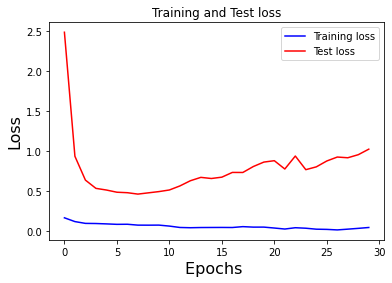

<Figure size 432x288 with 0 Axes>

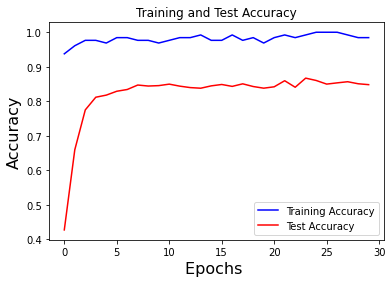

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(range(len(train_loss)), train_loss, 'b', label='Training loss')
plt.plot(range(len(train_loss)), test_loss, 'r', label='Test loss')
plt.title('Training and Test loss')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.figure()
plt.show()

plt.plot(range(len(train_loss)), train_accuracy, 'b', label='Training Accuracy')
plt.plot(range(len(train_loss)), test_accuracy, 'r', label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.legend()
plt.figure()
plt.show()

# For Part 3

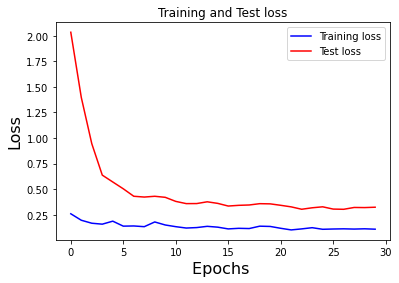

<Figure size 432x288 with 0 Axes>

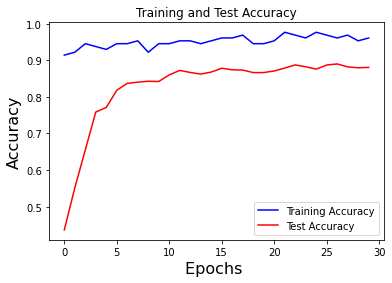

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(range(len(train_loss_2)), train_loss_2, 'b', label='Training loss')
plt.plot(range(len(train_loss_2)), test_loss_2, 'r', label='Test loss')
plt.title('Training and Test loss')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.figure()
plt.show()

plt.plot(range(len(train_loss_2)), train_accuracy_2, 'b', label='Training Accuracy')
plt.plot(range(len(train_loss_2)), test_accuracy_2, 'r', label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.legend()
plt.figure()
plt.show()

## As it can be seen adding batch norm., drop out has regularized the model and reduced overfitting. Along with it the Test accuracy of modified architecture is also more.